In [1]:
# install PyAudio http://people.csail.mit.edu/hubert/pyaudio/
# pip install pyaudio
import pyaudio
import wave
import sys

# default settings for record and playback
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22050

def play_stream(wave_stream):
    global CHUNK
    print("Playing...")
    p = pyaudio.PyAudio()
    out_stream = p.open(format=p.get_format_from_width(wave_stream.getsampwidth()),
                channels=wave_stream.getnchannels(),
                rate=wave_stream.getframerate(),
                output=True)
    data = wave_stream.readframes(CHUNK)
    while data:
        out_stream.write(data)
        data = wave_stream.readframes(CHUNK)
    out_stream.stop_stream()
    out_stream.close()
    p.terminate()
    print("played")


def record_to_file(filename, seconds=5):
    global FORMAT, CHANNELS, RATE
    RECORD_SECONDS = seconds
    p = pyaudio.PyAudio()
    stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)
    print("Start recording... ")
    frames = []
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    print("...recorded", seconds, "second(s)")
    stream.stop_stream()
    stream.close()
    p.terminate()
    wf = wave.open(filename, 'wb')
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(p.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(b''.join(frames))
    wf.close()

In [2]:
sample = "C:/dev/peterpiper.wav"
buffer = "C:/dev/buffer.wav"

wf = wave.open(sample, 'rb')
play_stream(wf)

record_to_file(buffer)
wf = wave.open(buffer, 'rb')
play_stream(wf)

Playing...
played
Start recording... 
...recorded 5 second(s)
Playing...
played


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  import sys


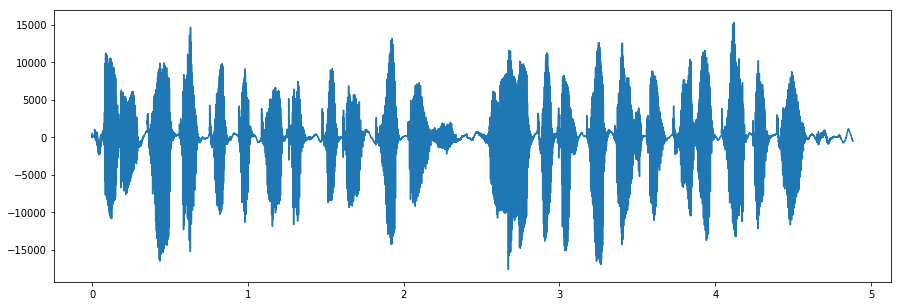

In [3]:
import numpy as np
import matplotlib.pyplot as plt

wave_file = "C:/dev/peterpiper.wav"
wf = wave.open(wave_file, 'rb')
data = wf.readframes(-1)
signal = np.fromstring(data, 'Int16')
time = [i / RATE for i in range(len(signal))]
plt.figure(figsize=(15,5))
plt.plot(time, signal)
plt.show()

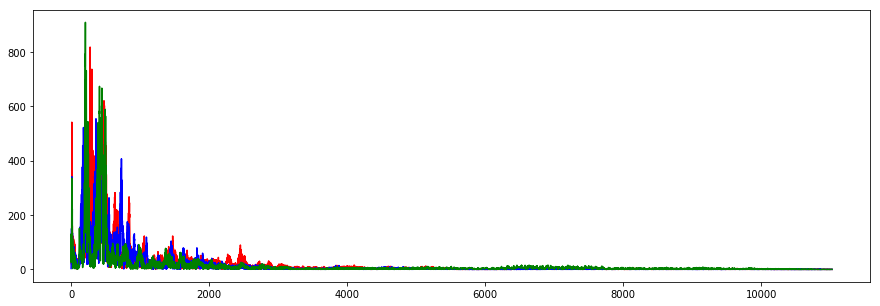

In [4]:
from scipy.fftpack import fft
from scipy.io import wavfile # get the api

norm_sig = [(x / 8192.) - 1 for x in signal]

complex_spectrum = fft(norm_sig[:RATE]) # calculate fourier transform for a sec. Values are complex
d = len(complex_spectrum) // 2          # you only need half of the fft list (real signal symmetry)
spectrum = abs(complex_spectrum[1:d]) 

complex_spectrum = fft(norm_sig[RATE:2*RATE])
spectrum1 = abs(complex_spectrum[1:d]) 

complex_spectrum = fft(norm_sig[RATE*2:3*RATE])
spectrum2 = abs(complex_spectrum[1:d]) 


plt.figure(figsize=(15,5))
plt.plot(spectrum, color='r')
plt.plot(spectrum1, color='b')
plt.plot(spectrum2, color='g')
plt.show()